In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
lectura_attacks = pd.read_csv("attacks_modificado.csv", index_col = 0)
lectura_attacks.head() 

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species
Case Number,,,,,,,,,,,
2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark
2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN
2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN
2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark
2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m"


EJERCICIO 1: ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
lectura_attacks_copia = lectura_attacks.copy()
lectura_attacks_copia = lectura_attacks_copia.dropna()


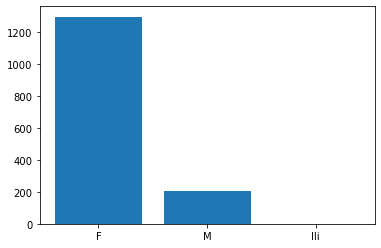

In [4]:
sex = lectura_attacks_copia['Sex '].value_counts()
sex_labels =  lectura_attacks_copia['Sex '].unique()

plt.figure()

plt.bar(sex_labels,sex)

plt.show()

EJERCICIO 2: ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [5]:
nulos = lectura_attacks.isnull().sum()
porcentaje_isnull = (nulos/ len(lectura_attacks)*100)
porcentaje_isnull = np.round(porcentaje_isnull, decimals = 2)
print(porcentaje_isnull)

Year         0.00
Type         0.07
Country      0.65
Area         6.67
Location     7.98
Activity     8.36
Name         3.27
Sex          9.00
Age         43.60
Time        52.01
Species     44.24
dtype: float64


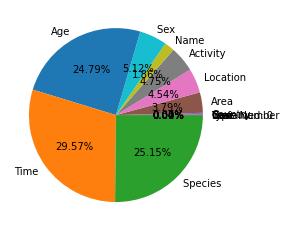

In [10]:
nulls_labels =  lectura_attacks_copia.columns

plt.figure()

plt.pie(porcentaje_isnull, labels=nulls_labels, autopct='%1.2f%%')
plt.show()

### EJERCICIO 3
¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?

In [9]:
lectura_attacks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6114 entries, 2018.06.25 to 1801.12.18.R
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      6114 non-null   float64
 1   Type      6110 non-null   object 
 2   Country   6074 non-null   object 
 3   Area      5706 non-null   object 
 4   Location  5626 non-null   object 
 5   Activity  5603 non-null   object 
 6   Name      5914 non-null   object 
 7   Sex       5564 non-null   object 
 8   Age       3448 non-null   object 
 9   Time      2934 non-null   object 
 10  Species   3409 non-null   object 
dtypes: float64(1), object(10)
memory usage: 573.2+ KB


['Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Time', 'Species ']
[8, 201, 791, 4020, 1484, 5118, 6, 156, 366, 1529]


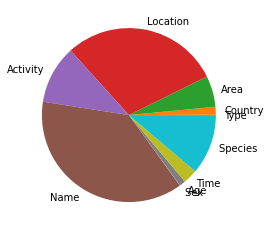

In [86]:
columnas = lectura_attacks[['Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Time', 'Species ']]
#he cambiado lectura_attacks.columns porque incluia la columna numerica
x= []
y=[]
for columna in columnas:
    x.append(columna)
print(x)

y=[]
for valor in range(len(x)):
    todas_labels = lectura_attacks[x[valor]].value_counts()
    y.append(len(todas_labels))
print(y)


plt.figure()

plt.pie(y, labels=x)
plt.show()


### EJERCICIO 4
Filtrad los datos para quedarnos solo con los datos de USA.
 - ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
 - En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [ ]:
lectura_attacks_copia.head()
lectura_attacks_copia.reset_index()

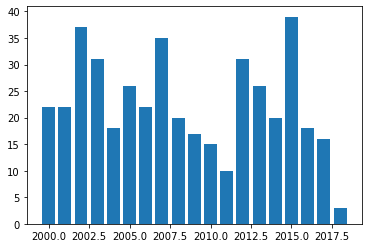

In [122]:
filtro_USA1 = lectura_attacks_copia[((lectura_attacks_copia['Country'] == 'USA') & (lectura_attacks_copia['Year'] >= 2000))]

años_x = filtro_USA1['Year'].unique()
años_x = años_x[::-1] #Para invertir el orden de los años de menor a mayor
y1=[]
for filtro in range(len(años_x)):
    filtro1 = filtro_USA1[filtro_USA1['Year'] == años_x[filtro]]
    y1.append(filtro1.shape[0])

plt.bar(años_x, y1)
plt.show()



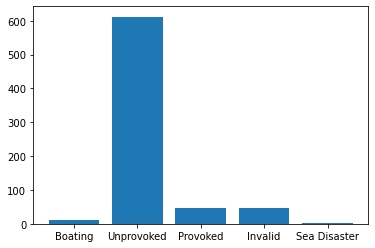

In [144]:
filtro_USA2 = lectura_attacks_copia[lectura_attacks_copia['Country'] == 'USA']
tipo = lectura_attacks_copia['Type'].unique()

y2=[]
for filtro in range(len(tipo)):
    filtro2 = filtro_USA2[filtro_USA2['Type'] == tipo[filtro]]
    y2.append(filtro2.shape[0])

plt.bar(tipo, y2)
plt.show()

### Ejercicio 5
Filtrad los datos para Spain:
- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

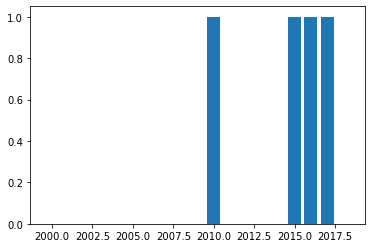

In [145]:
filtro_Spain = lectura_attacks_copia[((lectura_attacks_copia['Country'] == 'SPAIN') & (lectura_attacks_copia['Year'] >= 2000))]

años_x1 = filtro_Spain['Year'].unique()
años_x1= años_x[::-1] #Para invertir el orden de los años de menor a mayor

y3=[]
for filtro in range(len(años_x1)):
    filtro3 = filtro_Spain[filtro_Spain['Year'] == años_x1[filtro]]
    y3.append(filtro3.shape[0])

plt.bar(años_x1, y3)
plt.show()

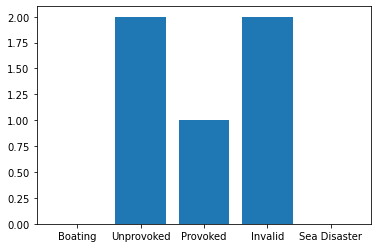

In [150]:
filtro_Spain2 = lectura_attacks_copia[lectura_attacks_copia['Country'] == 'SPAIN']
tipo1 = lectura_attacks_copia['Type'].unique()

y4=[]
for filtro in range(len(tipo1)):
    filtro2 = filtro_Spain2[filtro_Spain2['Type'] == tipo1[filtro]]
    y4.append(filtro2.shape[0])

plt.bar(tipo1, y4)
plt.show()